17465344/17464789 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 15000 samples, validate on 10000 samples
Epoch 1/10
15000/15000 [==============================] - 2s 119us/sample - loss: 0.5597 - acc: 0.7655 - val_loss: 0.3875 - val_acc: 0.8575
Epoch 2/10
15000/15000 [==============================] - 1s 97us/sample - loss: 0.2783 - acc: 0.9020 - val_loss: 0.2856 - val_acc: 0.8866
Epoch 3/10
15000/15000 [==============================] - 1s 96us/sample - loss: 0.1773 - acc: 0.9407 - val_loss: 0.2801 - val_acc: 0.8879
Epoch 4/10
15000/15000 [==============================] - 1s 98us/sample - loss: 0.1237 - acc: 0.9616 - val_loss: 0.3052 - val_acc: 0.8831
Epoch 5/10
15000/15000 [==============================] - 1s 96us/sample - loss: 0.0868 - acc: 0.9770 - val_loss: 0.3344 - val_acc: 0.8796
Epoch 6/10
150

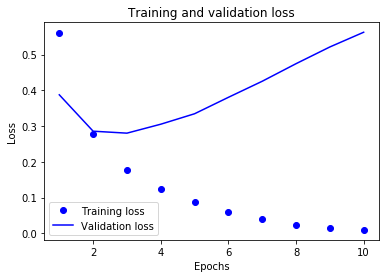

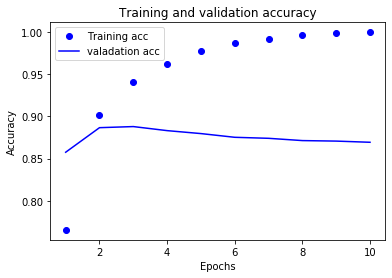

[[0.02260554]
 [0.9999993 ]
 [0.92850316]
 ...
 [0.00498426]
 [0.01013133]
 [0.86675936]]


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

imdb_data = tf.keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb_data.load_data(num_words = 10000)

'''
print(train_data[0]) # 부정을 나타내는 0과 긍정을 나타내는 인덱스 1
max([max(sequence) for sequence in train_data]) # 단어 인덱스 10000으로 제한 했으므로 최대는 9999


word_index = imdb_data.get_word_index() # imdb_data.get_word_index는 단어와 정수 인덱스를 매핑한 dictionary 리턴

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()]) 
# items() 는 dictionary의 key 와 value를 list 로 반환을 하고, value와 key 값을 뒤집어줘서 dict 형식으로 반환.
# 정수 인덱스와 단어를 매핑하도록 뒤집기

decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
# print(decoded_review)


train_data 을 디코딩하는데 get() 은 key값을 통해 value 를 찾아주고 못찾은 경우에는 '?' 로 대체. 
이 작업이 필요한 이유는 위에서 데이터를 받아올 때 num_words=10000 을 통해 만 개의 자주 쓰이는 단어만 가져왔으므로 
나머지 단어에 대해서는 값이 존재하지 않으므로 다음 작업이 필요하다. 그리고 각 단어를 join() 을 통해서 공백으로 이어준다. 
이 때 0,1,2 에 해당하는 값은 '패딩', '문서 시작', '사전에 없음' 을 위함이므로 3을 빼고 계산한다.
'''

# 신경망 데이터 주입을 위해 텐서로 변환 (정수 시퀀스를 이진 행렬로 인코딩)

def vectorize_sequence(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    # 크기가 (len(sequences), dimension)이고 모든 원소가 0인 행렬 생성
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. # results[i]에서 특정 인덱스의 위치를 1로 만든다.
    return results

x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


# 모델 정의
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(16, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


# 모델 컴파일
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])


# 훈련 검증 데이터 세트 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


# 모델 훈련
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 10,
                    batch_size = 512,
                    validation_data=(x_val, y_val))


# 훈련과 검증손실 그리기

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 훈련과 검증 정확도 그리기

plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label= 'valadation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

print(model.predict(x_test))